## PROJECT - STATE CRIME STATISTICS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az

In [2]:
df = pd.read_csv("state_crime.csv")
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [3]:
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [4]:
for i in range(0, len(df)):
    if df['Data.Rates.Property.All'][i] <  df['Data.Rates.Property.Burglary'][i]:
        x = df['Data.Rates.Property.All'][i]
        df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] = x
    if df['Data.Rates.Property.Larceny'][i] <  df['Data.Rates.Property.Motor'][i]:
        y = df['Data.Rates.Property.Larceny'][i]
        df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = y
    if df['Data.Rates.Property.Burglary'][i] <  df['Data.Rates.Property.Motor'][i]:
        z = df['Data.Rates.Property.Burglary'][i]
        df['Data.Rates.Property.Burglary'][i] =  df['Data.Rates.Property.Motor'][i]
        df['Data.Rates.Property.Motor'][i] = z

# for j in range(0, len(df)):       
#     if df['Data.Rates.Property.Larceny'][j] <  df['Data.Rates.Property.Motor'][j]:
#         y = df['Data.Rates.Property.Larceny'][j]
#         df['Data.Rates.Property.Larceny'][j] =  df['Data.Rates.Property.Motor'][j]
#         df['Data.Rates.Property.Motor'][j] = y 

/tmp/ipykernel_35721/2898082888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.All'][i] =  df['Data.Rates.Property.Burglary'][i]
/tmp/ipykernel_35721/2898082888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Burglary'][i] = x
/tmp/ipykernel_35721/2898082888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data.Rates.Property.Larceny'][i] =  df['Data.Rates.Property.Motor']

In [5]:
df.loc[df['Year'] > 2010]

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
51,Alabama,2011,4803689,3605.4,1064.2,2314.9,222.0,419.8,282.9,6.2,...,102.1,173192,51119,111411,10662,20166,13591,299,1370,4906
52,Alabama,2012,4822023,3502.2,984.7,2312.8,204.8,449.9,311.8,7.1,...,104.1,168878,47481,111523,9874,21693,15035,342,1296,5020
53,Alabama,2013,4833722,3351.3,877.8,2254.8,285.2,430.8,96.2,7.2,...,29.5,13787,161993,42429,108993,20826,4648,347,2044,1428
54,Alabama,2014,4849377,3177.6,819.0,2149.5,283.4,427.4,96.9,5.7,...,29.6,13745,154094,39715,104238,20727,4701,276,2005,1436
55,Alabama,2015,4858979,2978.9,725.6,2040.7,328.3,472.4,94.9,7.2,...,30.0,15954,144746,35255,99156,22952,4611,348,2039,1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,Wyoming,2015,586107,1902.6,300.6,1500.9,179.8,222.1,10.1,2.7,...,21.3,1054,11151,1762,8797,1302,59,16,173,125
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,...,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,...,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,...,17.3,10313,1525,7949,839,1226,870,13,243,100


In [6]:
california = df[df["State"] == "California"]

In [7]:
# california.head(60)

# Correct the data -> guess which data come from which column - to delete/modify later

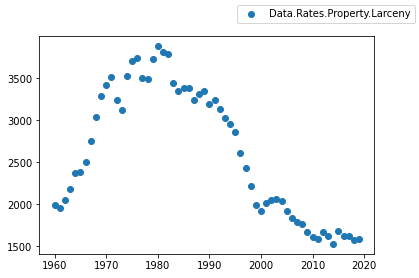

In [8]:
#sns.scatterplot(data=california, x = 'Year', y = 'Data.Population', hue = 'State')
fig,ax = plt.subplots()

# ax.scatter(data=california, x = 'Year', y = 'Data.Population')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Murder')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
# ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.All')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Rape')
fig.legend()
#sns.scatterplot(df['Year'], df['Data.Population'], hue = 'State')

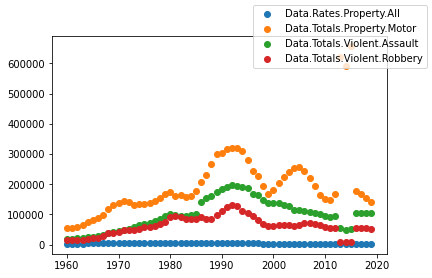

In [9]:
fig,ax = plt.subplots()


ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.Larceny')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.Motor')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.Assault')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.Murder')
ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.Robbery')
#ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
#ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.Rape')
fig.legend()

# Basic analysis of the data

Text(0, 0.5, 'Population')

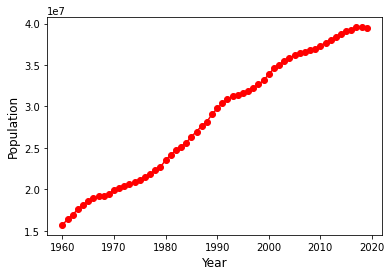

In [10]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(california['Year'], california['Data.Population'], color="red", marker = 'o')
# set x-axis label
ax.set_xlabel("Year",fontsize=12)
# set y-axis label
ax.set_ylabel("Population",fontsize=12)

Text(0.5, 1.0, 'Larceny rates in California')

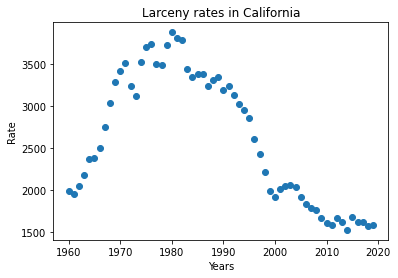

In [11]:
fig,ax = plt.subplots()
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.set_ylabel("Rate")
ax.set_xlabel("Years")
ax.set_title("Larceny rates in California")

In [12]:
california_larceny = california.filter(['Year', 'Data.Rates.Property.Larceny'], axis = 1)
#california_larceny.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
#print(california_larceny)

In [13]:
california_larceny.describe()

,Year,Data.Rates.Property.Larceny
count,60.000000,60.000000
mean,1989.500000,2620.975000
std,17.464249,778.947315
min,1960.000000,1527.400000
25%,1974.750000,1922.125000
50%,1989.500000,2555.650000
75%,2004.250000,3346.200000
max,2019.000000,3880.000000


In [32]:
mean_larceny = round(california_larceny["Data.Rates.Property.Larceny"].mean())
print(mean_larceny)
std_larceny = round(california_larceny["Data.Rates.Property.Larceny"].std())
print(std_larceny)
normalized_california_larceny = california_larceny["Data.Rates.Property.Larceny"]/ 3880
print(normalized_california_larceny)

2621
779
240    0.511546
241    0.502732
242    0.529098
243    0.563067
244    0.609923
245    0.615464
246    0.645928
247    0.708454
248    0.781521
249    0.846057
250    0.881985
251    0.906675
252    0.835567
253    0.805052
254    0.908634
255    0.954562
256    0.965412
257    0.902010
258    0.899175
259    0.962010
260    1.000000
261    0.983531
262    0.975541
263    0.887758
264    0.862397
265    0.870979
266    0.872139
267    0.835103
268    0.854253
269    0.862500
270    0.824098
271    0.836598
272    0.808711
273    0.780696
274    0.762294
275    0.736314
276    0.671418
277    0.626521
278    0.571418
279    0.513969
280    0.496005
281    0.519742
282    0.526985
283    0.531624
284    0.523995
285    0.493557
286    0.473015
287    0.461495
288    0.456237
289    0.429124
290    0.414536
291    0.408247
292    0.430284
293    0.417912
294    0.393660
295    0.432242
296    0.418299
297    0.418531
298    0.405103
299    0.408840
Name: Data.Rates.Property.Larce

In [15]:
mean_larceny = round(2620.975000)
std_larceny = round(778.947315)

In [73]:
california_larceny_df=pd.DataFrame(california_larceny["Data.Rates.Property.Larceny"]).to_numpy().flatten()
print(california_larceny_df)
#print(dfc["Data.Rates.Property.Larceny"])

[1984.8 1950.6 2052.9 2184.7 2366.5 2388.  2506.2 2748.8 3032.3 3282.7
 3422.1 3517.9 3242.  3123.6 3525.5 3703.7 3745.8 3499.8 3488.8 3732.6
 3880.  3816.1 3785.1 3444.5 3346.1 3379.4 3383.9 3240.2 3314.5 3346.5
 3197.5 3246.  3137.8 3029.1 2957.7 2856.9 2605.1 2430.9 2217.1 1994.2
 1924.5 2016.6 2044.7 2062.7 2033.1 1915.  1835.3 1790.6 1770.2 1665.
 1608.4 1584.  1669.5 1621.5 1527.4 1677.1 1623.  1623.9 1571.8 1586.3]


# Prior predictive check

In [88]:
normal_model1 = CmdStanModel(stan_file = 'normal1.stan')
stan_data={"data_mu": mean_larceny, "data_sigma": std_larceny}

R = 60 #bc the data has been collected for 60 years
sim = normal_model1.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
mu_sim = sim.stan_variable('mu')
sigma_sim = sim.stan_variable('sigma')
prior = sim.stan_variable('prior')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [57]:
print((mu_sim))
print(len(sigma_sim))
print(prior)

[0.95728  0.832114 0.695117 0.475637 0.599368 0.363441 0.675936 0.83054
 0.83974  0.178978 1.0278   0.638214 0.841863 0.754666 0.730143 0.661825
 0.637133 0.637158 0.458692 0.773123 0.56226  0.508053 0.395266 0.636627
 0.881737 0.379676 0.982642 0.777437 0.360797 0.559727 0.112692 0.936124
 0.746226 0.704699 0.932872 0.443711 0.781618 0.923519 0.722972 0.796979
 0.777284 0.593668 0.491947 0.628261 0.922779 0.786637 0.415273 0.55843
 0.855685 0.476107 0.902909 0.646631 0.439226 0.34548  0.773642 0.813988
 0.693541 0.914048 0.832429 0.699982]
60
[ 0.997083  0.775895  0.461995  0.513161  0.838299  0.392111  0.79808
  0.880216  0.832568  0.340101  0.993895  1.07332   1.1808    0.705755
  0.88755   0.538544  0.680004  0.844309  0.355393  0.407515  0.420023
  0.590845  0.448142  0.774773  0.878949  0.44357   1.126     0.674577
  0.82931   0.502857  0.144423  1.09136   0.977986  0.732299  1.22343
  0.801614  0.688234  0.711113  0.630507  0.758805  0.69814   0.556363
  0.566754  0.839796  0.86

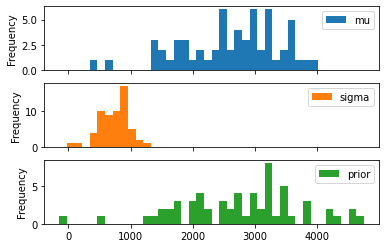

/home/kasia/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


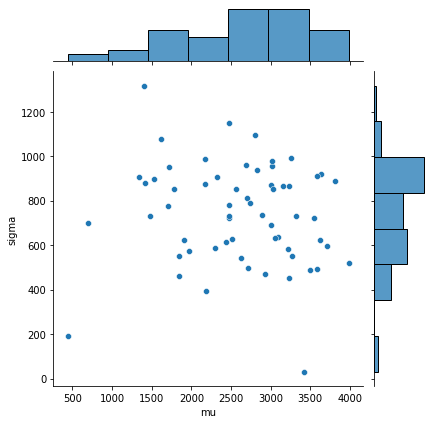

In [90]:
#histograms

df = pd.DataFrame({'mu': mu_sim, 'sigma': sigma_sim, 'prior':prior})
df.plot.hist(subplots=True, bins=40)
plt.show()


#joint distribution
df2 = pd.DataFrame({'mu': mu_sim, 'sigma': sigma_sim})
sns.jointplot(df2.mu, df2.sigma)

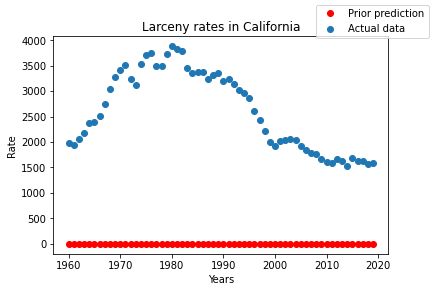

In [63]:
fig,ax = plt.subplots()
x= list(range(1960,2020))
plt.plot(x, prior, "o", color = 'red', label = 'Prior prediction')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny', label = 'Actual data')
#ax.scatter(data=prior, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.set_ylabel("Rate")
ax.set_xlabel("Years")
ax.set_title("Larceny rates in California")
fig.legend()

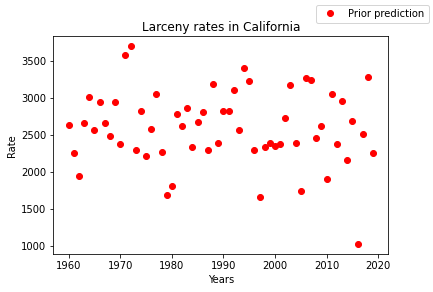

In [20]:
fig,ax = plt.subplots()
x= list(range(1960,2020))
plt.plot(x, prior, "o", color = 'red', label = 'Prior prediction')
# ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny', label = 'Actual data')
#ax.scatter(data=prior, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.set_ylabel("Rate")
ax.set_xlabel("Years")
ax.set_title("Larceny rates in California")
fig.legend()

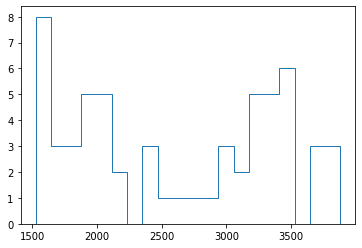

In [21]:
plt.hist(california_larceny['Data.Rates.Property.Larceny'], bins=20, label= "life_exp", histtype='step')
plt.show()

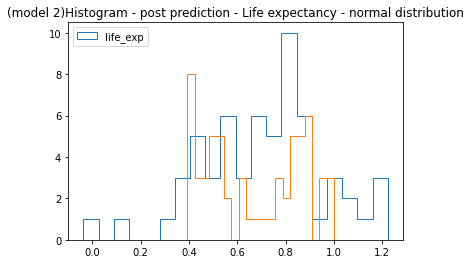

In [66]:
# prior.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
# np.histogram(prior, bins = 20)
plt.hist(prior, bins=20, label= "life_exp", histtype='step')
plt.legend(loc="upper left")
plt.title("(model 2)Histogram - post prediction - Life expectancy - normal distribution")
plt.hist(california_larceny['Data.Rates.Property.Larceny']/3880, bins=20, label= "life_exp", histtype='step')
plt.show()

### <code style = "background:yellow;color:black">**Nie wiem co zrobic z tymi histogramami - jak one spelniaja funkcje i czy sa wgl potrzebne?**
</code>
Wygladaja jakby przedstawialy histogramy z rzeczywistych danych, a nie z modelu....

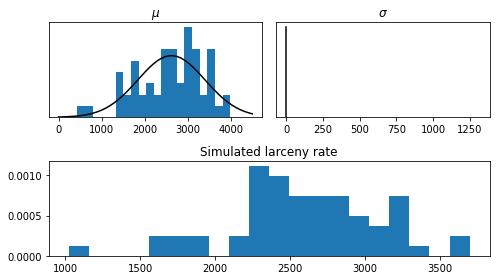

In [23]:
fig = plt.figure(figsize = (7, 4))

gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[1, :])
ax1.hist(prior, bins = 20, density = True)
ax1.set_title('Simulated larceny rate')

ax2 = fig.add_subplot(gs[0, 0])
ax2.hist(mu_sim, bins = 20, density = True)
x = np.linspace(0, 4500)
y = stats.norm.pdf(x, loc = mean_larceny, scale = std_larceny)
ax2.plot(x, y, 'black')
ax2.set_title('$\mu$')
ax2.set_yticks([])

ax3 = fig.add_subplot(gs[0, 1])
ax3.hist(sigma_sim, bins = 20, density = True)
x = np.linspace(0, 0.01)
y = stats.expon.pdf(x, scale = 1/std_larceny)
ax3.plot(x, y, color = 'black')
ax3.set_title('$\sigma$')
ax3.set_yticks([])

fig.tight_layout()
plt.show()

In [36]:
normalized_california_larceny.head()


240    0.511546
241    0.502732
242    0.529098
243    0.563067
244    0.609923
Name: Data.Rates.Property.Larceny, dtype: float64

In [43]:
normalized_california_larceny.describe()

count    60.000000
mean      0.675509
std       0.200760
min       0.393660
25%       0.495393
50%       0.658673
75%       0.862423
max       1.000000
Name: Data.Rates.Property.Larceny, dtype: float64

In [44]:
normalized_mean=0.675509
normalized_std = 0.200760

In [74]:
test = CmdStanModel(stan_file = 'prior_test.stan')
stan_data={"N": len(california_larceny), "dane": california_larceny_df, 
           "std": std_larceny, "mean": mean_larceny}

R = 60 #bc the data has been collected for 60 years
sim = test.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
# mu_sim = sim.stan_variable('mu')
# sigma_sim = sim.stan_variable('sigma')
# prior = sim.stan_variable('prior')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


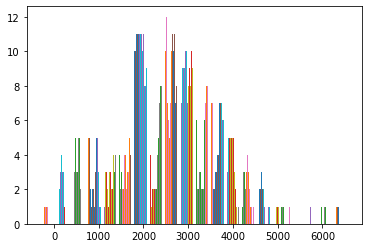

In [87]:
prior2 = sim.stan_variable('prior')
plt.hist(prior2, bins = 20)
#plt.hist(california_larceny['Data.Rates.Property.Larceny'], bins=20, histtype='step')

plt.show()

In [83]:
print(prior2)

[[3244.18 3247.34 3225.56 ... 3325.17 3334.9  3332.07]
 [1439.79 1464.41 1434.98 ... 1543.5  1553.84 1554.76]
 [1520.13 1524.9  1513.3  ... 1593.32 1607.52 1602.32]
 ...
 [1882.95 1890.57 1872.95 ... 1947.43 1953.45 1948.04]
 [2628.66 2617.13 2636.58 ... 2581.05 2553.35 2514.97]
 [1903.42 1889.28 1883.75 ... 1934.35 1991.48 1965.24]]


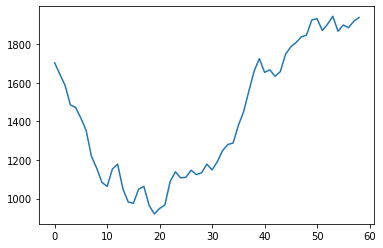

In [26]:
q50 =[]

for i in range(1,len(sim.stan_variable('prior')[1])):
    q50.append(np.quantile(sim.stan_variable('prior')[:,i],0.50))

plt.plot(q50)
plt.show()

#shape of real data

# Posterior 

In [27]:
normal1_fit_model = CmdStanModel(stan_file='normal1_fit.stan')
stan_data2 = {"N": len(california_larceny), "larceny_data" : california_larceny_df}
normal1_fit = normal1_fit_model.sample(data = stan_data2,iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                                   seed = 31052022)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [28]:
larceny_posterior = normal1_fit.stan_variable(var='larceny_posterior')
print(larceny_posterior)

[-0.220311  -0.463233  -0.698985  -0.0567073 -0.291832   0.404272
 -1.44146   -1.33571   -1.64756   -0.237705  -0.820555  -0.0468978
  0.360368  -1.80285   -0.145208  -0.396665  -0.501762  -1.35961
  0.234426   0.141938  -1.21536   -0.224019   0.18024    0.265577
 -0.527211  -2.57087   -0.79712    0.25255    0.963234  -1.44078
 -0.717251  -0.65882   -0.497725   1.32133    0.18908   -1.33317
  1.51696   -0.173967  -1.62444   -0.845313  -0.276068   0.0774964
  0.0447379 -0.560514  -0.244343  -0.977944  -0.663321   0.833618
 -0.381422  -0.663217  -0.715388   0.437991  -1.40627   -0.240691
 -0.900577  -0.0971207 -0.168085  -1.87637   -0.975057  -1.88562  ]


In [29]:
az.summary(normal1_fit, var_names=['mu', 'sigma'], round_to = 3, kind='stats')

,mean,sd,hdi_3%,hdi_97%
mu,-0.504,0.0,-0.504,-0.504
sigma,0.844,0.0,0.844,0.844
